Model trained and saved.
No Irrigation Needed
Accuracy: 0.505

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.25      0.32       191
           1       0.52      0.74      0.61       209

    accuracy                           0.51       400
   macro avg       0.49      0.49      0.47       400
weighted avg       0.49      0.51      0.47       400



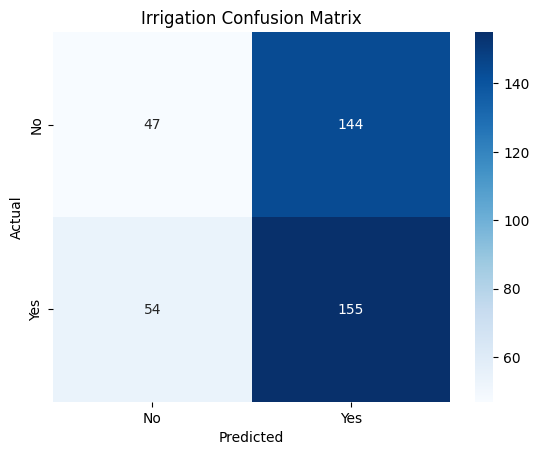

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import joblib

# Load your dataset (historical data where labels already exist)
df = pd.read_csv("synthetic_soil_data.csv")

# Features and target
X = df[["temperature", "soil_moisture", "rainfall"]]  # These are the input features
y = df["irrigate"]  # This is the target (Irrigation: 1 or 0)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model (or another model like RandomForest, etc.)
clf = DecisionTreeClassifier(max_depth=5, criterion="gini", class_weight="balanced")
clf.fit(X_train, y_train)  # The model will learn the relationship between the features and the target


# Save model
joblib.dump(clf, "irrigation_model_balanced.pkl")

# Save model for future use
joblib.dump(clf, "irrigation_model.pkl")
print("Model trained and saved.")

# Now you can load the trained model and make predictions
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("irrigation_model.pkl")

# Correct sensor input (must match model training features)
sensor_data = {
    "temperature": 33,
    "soil_moisture": 25,
    "rainfall": 0.0  # Example: No rainfall, soil moisture is low
}

# Convert the input data to a DataFrame
input_df = pd.DataFrame([sensor_data])

# Predict irrigation need based on input data
prediction = model.predict(input_df)[0]

# Output result
print("Irrigation Needed" if prediction == 1 else "No Irrigation Needed")

# Evaluate model performance on test set
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Irrigation Confusion Matrix")
plt.show()


In [3]:
import numpy as np
# Feature importance for Decision Tree
feature_importances = clf.feature_importances_
print("Feature Importances:", feature_importances)


Feature Importances: [0.26167134 0.47813279 0.26019587]
